# Covariates - UHT Milk Industry

In [1]:
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import pandas as pd

from utils import get_filtered_data, create_future_dataframe, plot_series

In [2]:
#Reading the data
df = get_filtered_data()

## Visualizing the Data

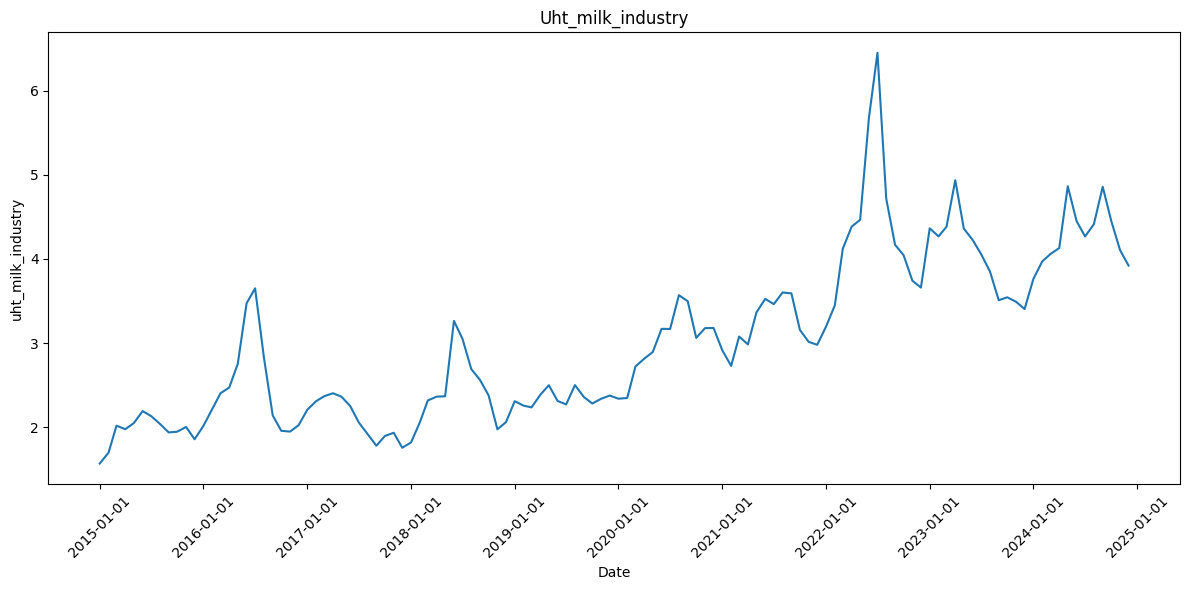

In [4]:
uht_milk_industry = df[['date', 'uht_milk_industry']] 
plot_series(uht_milk_industry, 'uht_milk_industry')

The `UHT Milk Industry` variable as the other covariates displays an increasing trend. By the plot above we can't see a clear sazonality. We might think that the pattern of price spike at the beggining of the year and a drop at the end might continue, but we can't be sure about it.

## Simple OLS Model

In [5]:
uht_milk_industry = (
    uht_milk_industry
    .assign(
        t = range(len(uht_milk_industry)),
        month = uht_milk_industry["date"].dt.month
    )
)

# Fit linear regression with trend + seasonal dummies
model_uht_milk_industry = smf.ols("uht_milk_industry ~ t + C(month)", data=uht_milk_industry).fit()

In [6]:
uht_milk_industry['fitted'] = model_uht_milk_industry.fittedvalues
model_uht_milk_industry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      uht_milk_industry   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     27.82
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.56e-27
Time:                        18:26:46   Log-Likelihood:                -81.276
No. Observations:                 120   AIC:                             188.6
Df Residuals:                     107   BIC:                             224.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3989      0.175      7.991      0.000       1.052       1.746
C(month)[T.2]      0.0572      0.226      0.253      0.800      -0.390       0.504
C(month)[T.3]      0.2743      0.226      1.216      0.227      -0.173       0.722
C(month)[T.4]      0.3655      0.226      1.620      0.108      -0.082       0.813
C(month)[T.5]      0.4556      0.226      2.019      0.046       0.008       0.903
C(month)[T.6]      0.6880      0.226      3.049      0.003       0.241       1.135
C(month)[T.7]      0.6675      0.226      2.957      0.004       0.220       1.115
C(month)[T.8]      0.4007      0.226      1.775      0.079      -0.047       0.848
C(month)[T.9]      0.2050      0.226      0.908      0.366      -0.243       0.653
C(month)[T.10]     0.0137      0.226      0.061      0.952      -0.434       0.462
C(month)[T.11]    -0.1087      0.226     -0.481      0.632      -0.557       0.339
C(month)[T.12]    -0.1830      0.226     -0.810      0.420      -0.631       0.265
t                  0.0232      0.001     17.337      0.000       0.021       0.026
==============================================================================
Omnibus:                       40.305   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.365
Skew:                           1.260   Prob(JB):                     4.85e-24
Kurtosis:                       6.889   Cond. No.                         857.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualizing the Fitted Model

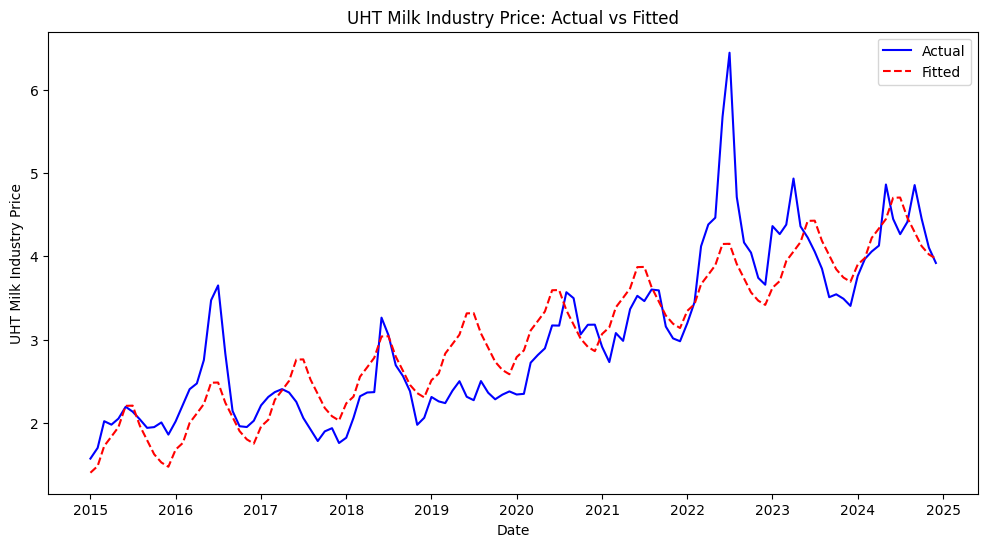

In [7]:
uht_milk_industry['fitted'] = model_uht_milk_industry.fittedvalues

# Plot actual vs fitted
plt.figure(figsize=(12, 6))
plt.plot(uht_milk_industry["date"], uht_milk_industry["uht_milk_industry"], label="Actual", color="blue")
plt.plot(uht_milk_industry["date"], uht_milk_industry["fitted"], label="Fitted", color="red", linestyle="--")

plt.title("UHT Milk Industry Price: Actual vs Fitted")
plt.xlabel("Date")
plt.ylabel("UHT Milk Industry Price")
plt.legend()
plt.show()

## Visualizing the Predictions on the Test Set

In [8]:
test_df = create_future_dataframe() 

uht_milk_industry = (
    uht_milk_industry
    .assign(
        t = range(len(uht_milk_industry)),
        month = uht_milk_industry["date"].dt.month
    )
)

# Fit linear regression with trend + seasonal dummies
model_uht_milk_industry = smf.ols("uht_milk_industry ~ t + C(month)", data=uht_milk_industry).fit()

## Predictions on Test Set

In [9]:
test_df = create_future_dataframe()

uht_milk_industry_preds = model_uht_milk_industry.predict(test_df)
test_df['uht_milk_industry'] = uht_milk_industry_preds

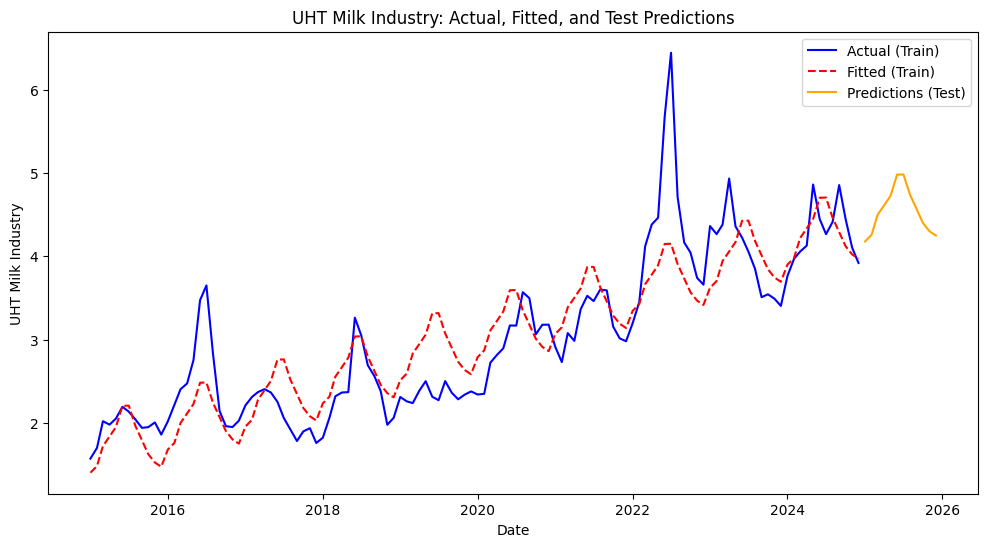

In [10]:
# Plot
plt.figure(figsize=(12, 6))

# Actual (train only)
plt.plot(uht_milk_industry["date"], uht_milk_industry["uht_milk_industry"],
         label="Actual (Train)", color="blue") 

# Fitted (train only)
plt.plot(uht_milk_industry["date"], uht_milk_industry["fitted"],
         label="Fitted (Train)", color="red", linestyle="--")

# Predictions (test only)
plt.plot(test_df["date"], test_df["uht_milk_industry"],
         label="Predictions (Test)", color="orange")

plt.title("UHT Milk Industry: Actual, Fitted, and Test Predictions")
plt.xlabel("Date")
plt.ylabel("UHT Milk Industry")
plt.legend()
plt.show()

## Saving the Predictions

In [11]:
test_df[['date', 'uht_milk_industry']].to_csv("../../predictions/2025_uht_milk_industry.csv", index=False)